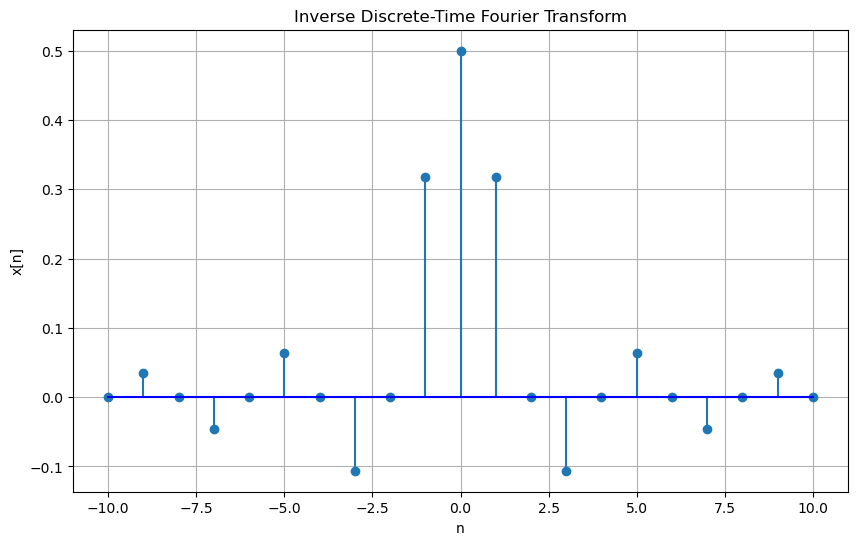

n 	 x[n]
-10	-0.0001
-9	0.0354
-8	0.0001
-7	-0.0455
-6	-0.0001
-5	0.0637
-4	0.0001
-3	-0.1061
-2	-0.0001
-1	0.3183
0	0.5001
1	0.3183
2	-0.0001
3	-0.1061
4	0.0001
5	0.0637
6	-0.0001
7	-0.0455
8	0.0001
9	0.0354
10	-0.0001


In [1]:
import math
import matplotlib.pyplot as plt

def idtft_manual(X_function, n_range, omega_range=(-math.pi, math.pi), step=1e-3):
    """
    Compute the Inverse DTFT of a given X(e^j\omega) manually.
    
    Parameters:
        X_function (function): A function that takes omega and returns X(e^j\omega).
        n_range (list): List of n values where x[n] will be computed.
        omega_range (tuple): Range of omega for integration (default: -pi to pi).
        step (float): Step size for numerical integration.
    
    Returns:
        x (dict): Dictionary of x[n] values.
    """
    x = {}
    omega_min, omega_max = omega_range
    for n in n_range:
        integral = 0
        omega = omega_min
        while omega <= omega_max:
            integral += X_function(omega) * math.cos(omega * n) * step  # Real part of IDTFT
            omega += step
        x[n] = (1 / (2 * math.pi)) * integral  # Scaling factor
    return x

def X_ejw(omega):
    """
    Define X(e^j\omega) based on the problem statement.
    It is 1 for -pi/2 <= omega <= pi/2, and 0 otherwise.
    """
    if -math.pi / 2 <= omega <= math.pi / 2:
        return 1
    return 0

# Define range of n values for which we compute x[n]
n_values = list(range(-10, 11))  # n from -10 to 10

# Compute IDTFT manually
x_n = idtft_manual(X_ejw, n_values)

# Plot results
plt.figure(figsize=(10, 6))
plt.stem(x_n.keys(), x_n.values(), basefmt="b")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Inverse Discrete-Time Fourier Transform")
plt.grid(True)
plt.show()

# Print results
print("n", "\t", "x[n]")
for n, value in x_n.items():
    print(f"{n}\t{value:.4f}")
